In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import SVC
import scipy.stats as sp
from sklearn.model_selection import GridSearchCV as GS

## Previously, I built SVR/SVC models without modifying the parameters.

Now, I will attempt to build the models using the GridSearch function to optimise the models being built.

In [2]:
msft = pd.DataFrame.from_csv('MSFT.csv')
msft = msft.interpolate()
#changing the index to go from 1986 to 2016
msft = msft.reindex(index=msft.index[::-1])
investor = pd.DataFrame.from_csv('investor.csv')
investor = investor.fillna(investor.mean())
#changing the index to go from 1987 to 2016
investor = investor.reindex(index=investor.index[::-1])

In [3]:
#quick reminder of what the data looks like
msft.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.060989,0.069957,0.060989,0.066968,1.031789e+09
1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.066968,0.070555,0.066968,0.069360,3.081600e+08
1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.069360,0.071153,0.069360,0.070555,1.331712e+08
1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.070555,0.071153,0.068164,0.068762,6.776640e+07
1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.068762,0.069360,0.066968,0.067566,4.789440e+07


In [4]:
investor.head()

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
1987-06-26,0.384424,0.312702,0.302874,0.999999,0.384009,0.08155,0.386014,0.489178,0.28285,1038.23181,1011.831541,1026.840289
1987-07-17,0.384424,0.312702,0.302874,0.999999,0.384009,0.08155,0.386014,0.489178,0.28285,314.59000,307.630000,314.590000
1987-07-24,0.360000,0.500000,0.140000,1.000000,0.384009,0.22000,0.386014,0.489178,0.28285,311.39000,307.810000,309.270000
1987-07-31,0.260000,0.480000,0.260000,1.000000,0.384009,0.00000,0.386014,0.489178,0.28285,318.66000,310.650000,318.660000
1987-08-07,0.560000,0.150000,0.290000,1.000000,0.384009,0.27000,0.386014,0.489178,0.28285,323.00000,316.230000,323.000000


## Using data from year 2005 for training and 2006 for testing and using all the sentiments features for modelling

In [4]:
investor2005 = investor['2005']
investorSentiments2005 = investor2005[['Bullish','Neutral','Bearish']]
msft2005 = msft.loc[investor2005.index].interpolate()
op2005 = msft2005.Open

In [ ]:
def pearson_correlation(clf, x, y):
    xresults = clf.predict(x)
    xlist = np.array(xresults.tolist())
    ylist = np.array(y.tolist())
    num1, num2 = sp.pearsonr(ylist, xlist)
    return num1

In [7]:
svrModel = SVR()

In [6]:
params =[ {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
           'epsilon':[0.001, 0.01, 0.1, 1, 5, 10, 100],
           'kernel':[ 'linear', 'rbf'],
          'gamma':[0, 0.001, 0.01, 0.1, 1]},
         {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
           'epsilon':[0.001, 0.01, 0.1, 1, 5, 10, 100],
           'kernel':['poly', 'sigmoid'],
          'degree':[1, 2, 3, 4, 5],
          'coef0':[0, 0.001, 0.01, 0.1, 1],
          'gamma':[0, 0.001, 0.01, 0.1, 1]}
         ]

In [9]:
gridsearch = GS(svrModel, param_grid=params, scoring=pearson_correlation)
gridsearch.fit(investorSentiments2005,op2005)
gridsearch.best_params_

{'C': 0.001, 'epsilon': 1, 'gamma': 0, 'kernel': 'linear'}

In [13]:
svrModel = SVR(C=0.001, epsilon=1, gamma='auto', kernel='linear')

In [14]:
svrModel.fit(investorSentiments2005,op2005)

SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
investor2006 = investor['2006']
investorSentiments2006 = investor2006[['Bullish','Neutral','Bearish']]
msft2006 = msft.loc[investorSentiments2006.index].interpolate()
op2006 = msft2006.Open

In [ ]:
svrPred2006 = svrModel.predict(investorSentiments2006)

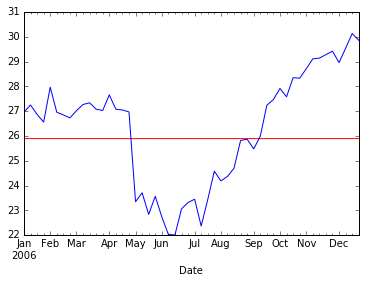

In [17]:
svrPred2006 = pd.Series(svrPred2006, investorSentiments2006.index)
svrPred2006.plot(color='red')
op2006.plot(color='blue')

In [18]:
svrPred2006list = np.array(svrPred2006.tolist())
ori2006list = np.array(op2006.tolist())


print('Pearson Correlation Coeefiecient: ', sp.pearsonr(ori2006list, svrPred2006list))

error2 = [((x-y)/y)**2 for x, y in zip(svrPred2006list, ori2006list)]
print ("Normalised RMSE",np.sqrt(np.sum(error2)))

('Pearson Correlation Coeefiecient: ', (0.49654851928320731, 0.00018108625849688197))
('Normalised RMSE', 0.63896485162039851)


I am unsure what happened. . . . now let's try SVC

In [9]:
lastdayof2004 = investor['2004']
lastdayof2004 = lastdayof2004.index[-1]
last2004stock = msft.loc[lastdayof2004].Open

In [10]:
UpOrDown2005 = []
previousday=last2004stock
for stock in op2005:    
    if (stock > previousday):
        UpOrDown2005.append(1)
    else:
        UpOrDown2005.append(-1)
    previousday = stock

In [11]:
UpOrDown2005 = pd.Series(UpOrDown2005, op2005.index)

In [12]:
svcModel = SVC()

In [5]:
params2 =[ {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],           
           'kernel':[ 'linear', 'rbf'],
          'gamma':[0, 0.001, 0.01, 0.1, 1]},
         {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
           'kernel':['poly', 'sigmoid'],
          'degree':[1, 2, 3, 4, 5],
          'coef0':[0, 0.001, 0.01, 0.1, 1],
          'gamma':[0, 0.001, 0.01, 0.1, 1]}
         ]

In [14]:
gridsearch2 = GS(svcModel, param_grid=params2, scoring='accuracy')
gridsearch2.fit(investorSentiments2005,UpOrDown2005)
gridsearch2.best_params_

{'C': 5, 'gamma': 1, 'kernel': 'rbf'}

In [15]:
svcModel = SVC(C=5, gamma=1, kernel='rbf')

In [16]:
svcModel.fit(investorSentiments2005,UpOrDown2005)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
lastdayof2005 = investor['2005']
lastdayof2005 = lastdayof2005.index[-1]
last2005stock = msft.loc[lastdayof2005].Open

In [18]:
UpOrDown2006 = []
previousday=last2005stock
for stock in op2005:    
    if (stock > previousday):
        UpOrDown2006.append(1)
    else:
        UpOrDown2006.append(-1)
    previousday = stock

In [19]:
UpOrDown2006 = pd.Series(UpOrDown2006, op2006.index)

In [20]:
print('Prediction: ',svcModel.predict(investorSentiments2006))
print('Actual: ', UpOrDown2006.tolist())

('Prediction: ', array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1]))
('Actual: ', [1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])


In [29]:
from __future__ import division
track = 0
for x in UpOrDown2006:
    if (x == 1):
       track=track+1
right = UpOrDown2006.count()-track
right/UpOrDown2006.count()

0.57692307692307687

In [3]:
pre2006 = investor['1987':'2005']
investorSentimentspre2006 = pre2006[['Bullish','Neutral','Bearish']]
pre2006 = msft.loc[investorSentimentspre2006.index]
pre2006 = pre2006.interpolate()
oppre2006 = pre2006.Open

In [34]:
updownpre2006 = []
previousday = oppre2006[0]
for stock in oppre2006[1:]:    
    if (stock > previousday):
        updownpre2006.append(1)
    else:
        updownpre2006.append(-1)
    previousday = stock

In [38]:
gridsearch3 = GS(svcModel, param_grid=params2, scoring='accuracy')
gridsearch3.fit(investorSentimentspre2006[1:],updownpre2006)
gridsearch3.best_params_

{'C': 100, 'coef0': 1, 'degree': 1, 'gamma': 1, 'kernel': 'sigmoid'}

In [39]:
svcModel2 = SVC(C=100, coef0=1, degree=1, gamma=1, kernel='sigmoid')

In [42]:
svcModel2.fit(investorSentimentspre2006[1:],updownpre2006)

SVC(C=100, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=1, gamma=1, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
print('Prediction: ',svcModel2.predict(investorSentiments2006))
print('Actual: ', UpOrDown2006.tolist())

('Prediction: ', array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1]))
('Actual: ', [1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])


In [45]:
pred2006 = svcModel2.predict(investorSentiments2006).tolist()
actual2006 = UpOrDown2006.tolist()

In [54]:
from __future__ import division

trackright=0
for x , y in zip(pred2006, actual2006):
    if (x==y):
        trackright+=1
trackright/len(actual2006)

0.5961538461538461